In [1]:
import pandas as pd
df = pd.read_csv('dataset/mushroom_overload.csv')

C:\Users\mostm\AppData\Local\Temp\ipykernel_1672\2326462879.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/mushroom_overload.csv')


********************************************
   1. **cap-diameter (m)**:			float number in cm
   2. **cap-shape (n)**:            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. **cap-surface (n)**:          fibrous=i, grooves=g, scaly=y, smooth=s, dry=d,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. **cap-color (n)**:            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. **does-bruise-bleed (n)**:	bruises-or-bleeding=t,no=f
   6. **gill-attachment (n)**:      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. **gill-spacing (n)**:         close=c, distant=d, none=f
   8. **gill-color (n)**:           see cap-color + none=f
   9. **stem-height (m)**:			float number in cm
   10. **stem-width (m)**:			float number in mm   
   11. **stem-root (n)**:           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. **stem-surface (n)**: 		see cap-surface + none=f
   13. **stem-color (n)**:			see cap-color + none=f
   14. **veil-type (n)**:           partial=p, universal=u
   15. **veil-color (n)**:          see cap-color + none=f
   16. **has-ring (n)**:            ring=t, none=f
   17. **ring-type (n)**:           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. **spore-print-color (n)**:   see cap color
   19. **habitat (n)**:             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. **season (n)**:				spring=s, summer=u, autumn=a, winter=w
   21. **class (n)**:				e=edible, p=poisonous
   ********************************************

***************************** EDA *****************************

In [3]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723111,p,1.16,f,s,y,f,f,f,f,2.95,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
6723112,p,1.34,f,s,y,f,f,f,f,2.94,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
6723113,p,1.20,f,s,y,f,f,f,f,3.76,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
6723114,p,1.32,s,s,y,f,f,f,f,3.12,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a


In [4]:
df.isnull().sum()

class                         0
cap-diameter                  0
cap-shape                     0
cap-surface             1579337
cap-color                     0
does-bruise-or-bleed          0
gill-attachment         1066721
gill-spacing            2800709
gill-color                    0
stem-height                   0
stem-width                    0
stem-root               5763499
stem-surface            4263506
stem-color                    0
veil-type               6367343
veil-color              5893024
has-ring                      0
ring-type                276729
spore-print-color       6049365
habitat                       0
season                        0
dtype: int64

In [5]:
# drop ข้อมูลที่ไม่จำเป็นในการจำแนกเห็ดพิษ
df = df.drop(columns=['gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'])

In [6]:
mapping = {
    "cap-shape": {
        "b": 1, "c": 2, "x": 3, "f": 4, "s": 5, "p": 6, "o": 7
    },
    "cap-surface": {
        "i": 1, "g": 2, "y": 3, "s": 4, "d": 5, "h": 6, "l": 7, "k": 8, "t": 9, "w": 10, "e": 11
    },
    "cap-color": {
        "n": 1, "b": 2, "g": 3, "r": 4, "p": 5, "u": 6, "e": 7, "w": 8, "y": 9, "l": 10, "o": 11, "k": 12
    },
    "does-bruise-or-bleed": {
        "t": 1, "f": 0
    },
    "gill-attachment": {
        "a": 1, "x": 2, "d": 3, "e": 4, "s": 5, "p": 6, "f": 7, "?": 8
    },
    "gill-color": {
        "f": 0, "n": 1, "b": 2, "g": 3, "r": 4, "p": 5, "u": 6, "e": 7, "w": 8, "y": 9, "l": 10, "o": 11, "k": 12
    },
    "stem-color": {
        "f": 0, "n": 1, "b": 2, "g": 3, "r": 4, "p": 5, "u": 6, "e": 7, "w": 8, "y": 9, "l": 10, "o": 11, "k": 12
    },
    "has-ring": {
        "t": 1, "f": 0
    },
    "ring-type": {
        "c": 1, "e": 2, "r": 3, "g": 4, "l": 5, "p": 6, "s": 7, "z": 8, "y": 9, "m": 10, "f": 0, "?": 11
    },
    "habitat": {
        "g": 1, "l": 2, "m": 3, "p": 4, "h": 5, "u": 6, "w": 7, "d": 8
    },
    "season": {"s": 1, "u": 2, "a": 3, "w": 4},
    "class": {"e": 1, "p": 0}
}


df.replace(mapping, inplace=True)

C:\Users\mostm\AppData\Local\Temp\ipykernel_18528\3847364941.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)


In [7]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,17.18,4,2.0,7,0,4.0,8,18.58,18.52,8,1,4.0,8,3
1,0,15.30,3,6.0,7,0,4.0,8,16.95,17.08,8,1,4.0,8,2
2,0,14.94,4,6.0,11,0,4.0,8,16.84,16.74,8,1,6.0,8,3
3,0,13.37,4,2.0,7,0,4.0,8,18.10,17.60,8,1,4.0,8,2
4,0,17.23,3,6.0,7,0,4.0,8,17.42,16.83,8,1,6.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723111,0,1.16,4,4.0,9,0,7.0,0,2.95,5.20,9,0,0.0,8,2
6723112,0,1.34,4,4.0,9,0,7.0,0,2.94,5.94,9,0,0.0,8,2
6723113,0,1.20,4,4.0,9,0,7.0,0,3.76,4.89,9,0,0.0,8,2
6723114,0,1.32,5,4.0,9,0,7.0,0,3.12,5.30,9,0,0.0,8,3


In [30]:
df_edible = df[df["class"] == 1]
df_edible


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1059,1,8.07,3,5.641247,1,1,3.271295,8,9.08,13.64,8,1,4.0,8,2
1060,1,10.72,4,5.641247,1,1,3.271295,8,11.97,20.29,8,1,4.0,8,2
1061,1,10.86,3,5.641247,1,1,3.271295,8,12.84,17.60,8,1,4.0,8,3
1062,1,13.33,4,5.641247,1,1,3.271295,8,13.18,22.36,8,1,4.0,8,3
1063,1,7.20,3,5.641247,1,1,3.271295,8,9.43,15.90,8,1,4.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722759,1,4.10,6,5.641247,3,0,7.000000,0,5.44,19.96,1,0,0.0,2,1
6722760,1,6.37,6,5.641247,3,0,7.000000,0,5.76,20.79,1,0,0.0,2,1
6722761,1,5.07,7,5.641247,1,0,7.000000,0,5.41,20.50,1,0,0.0,8,1
6722762,1,7.14,6,5.641247,3,0,7.000000,0,6.43,22.78,1,0,0.0,2,1


<Axes: >

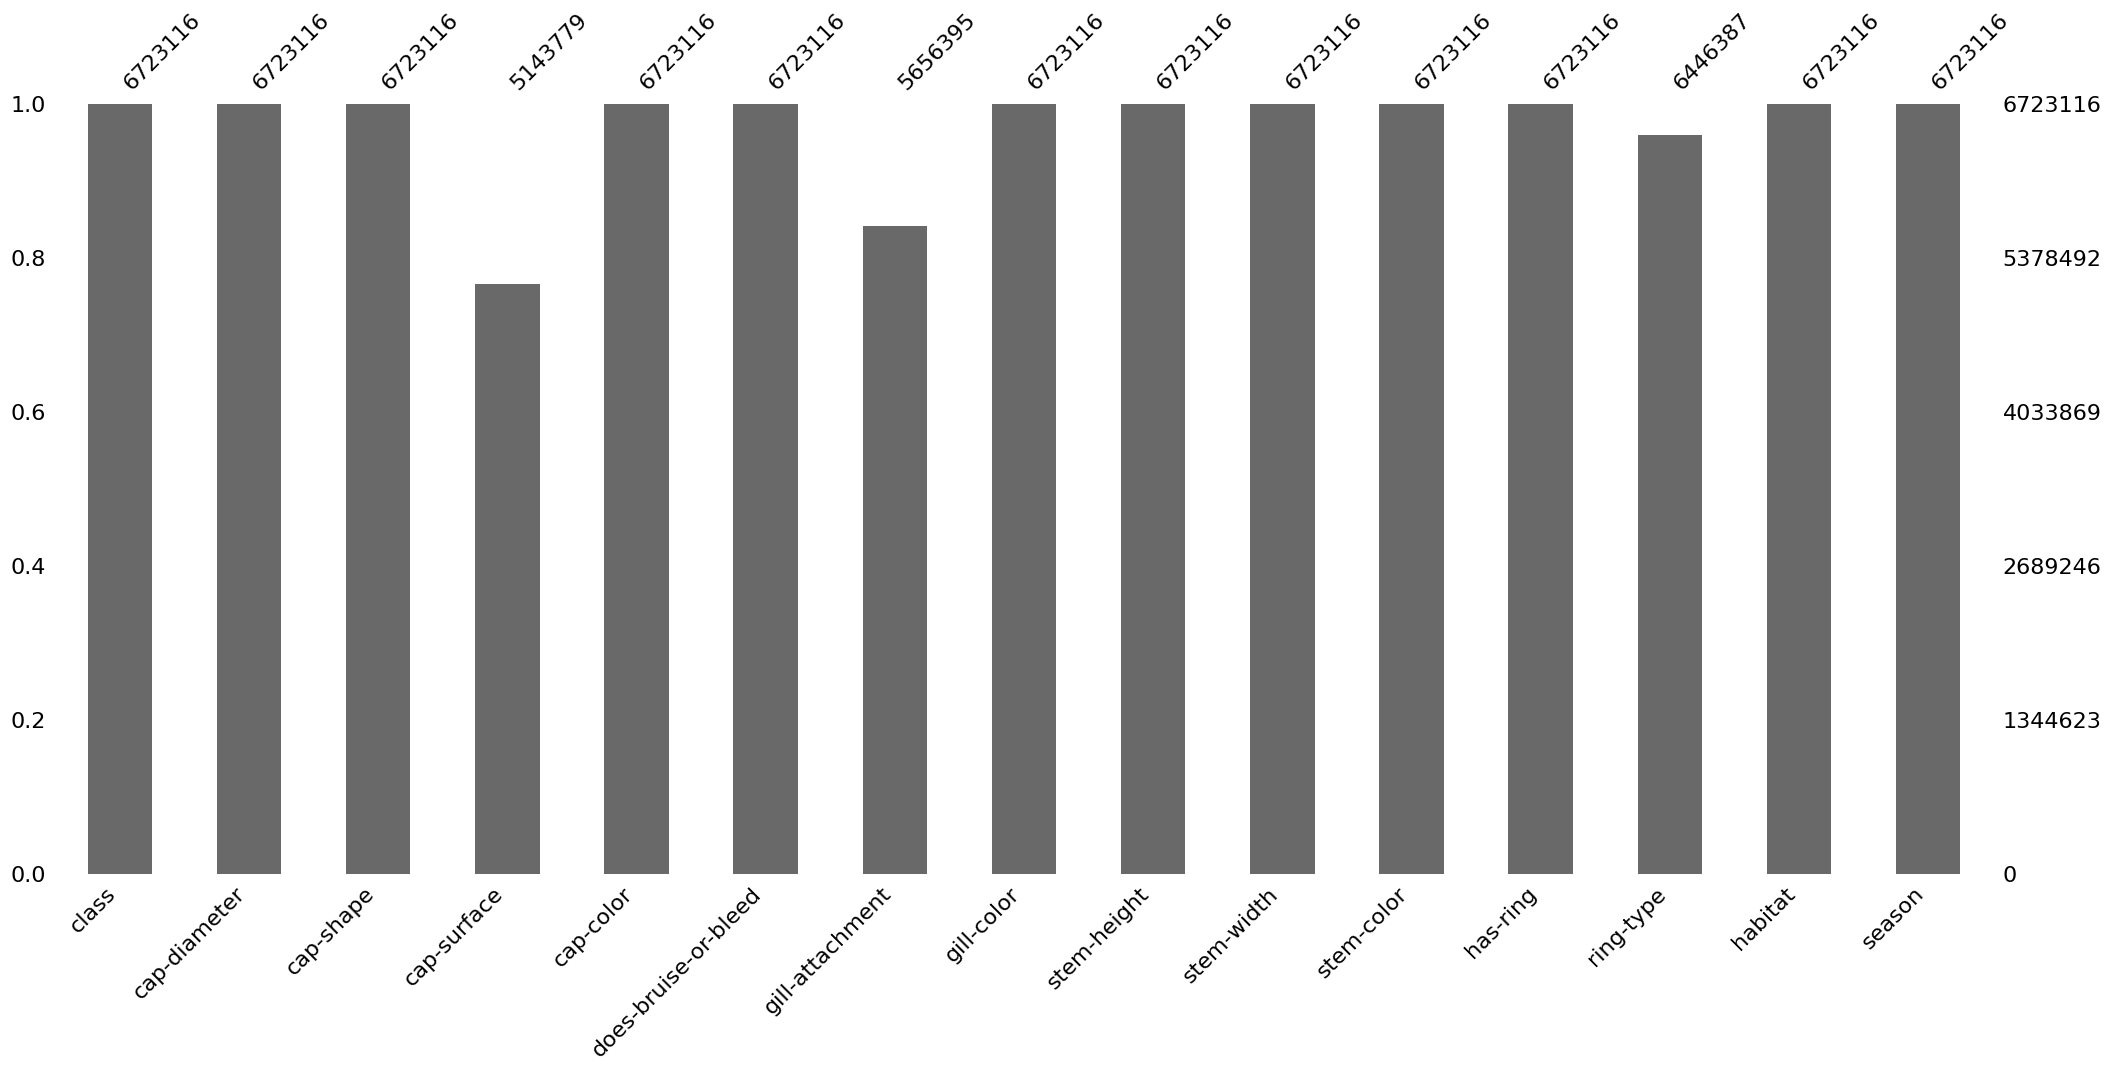

In [8]:
import missingno as msn
msn.bar(df)

<Axes: >

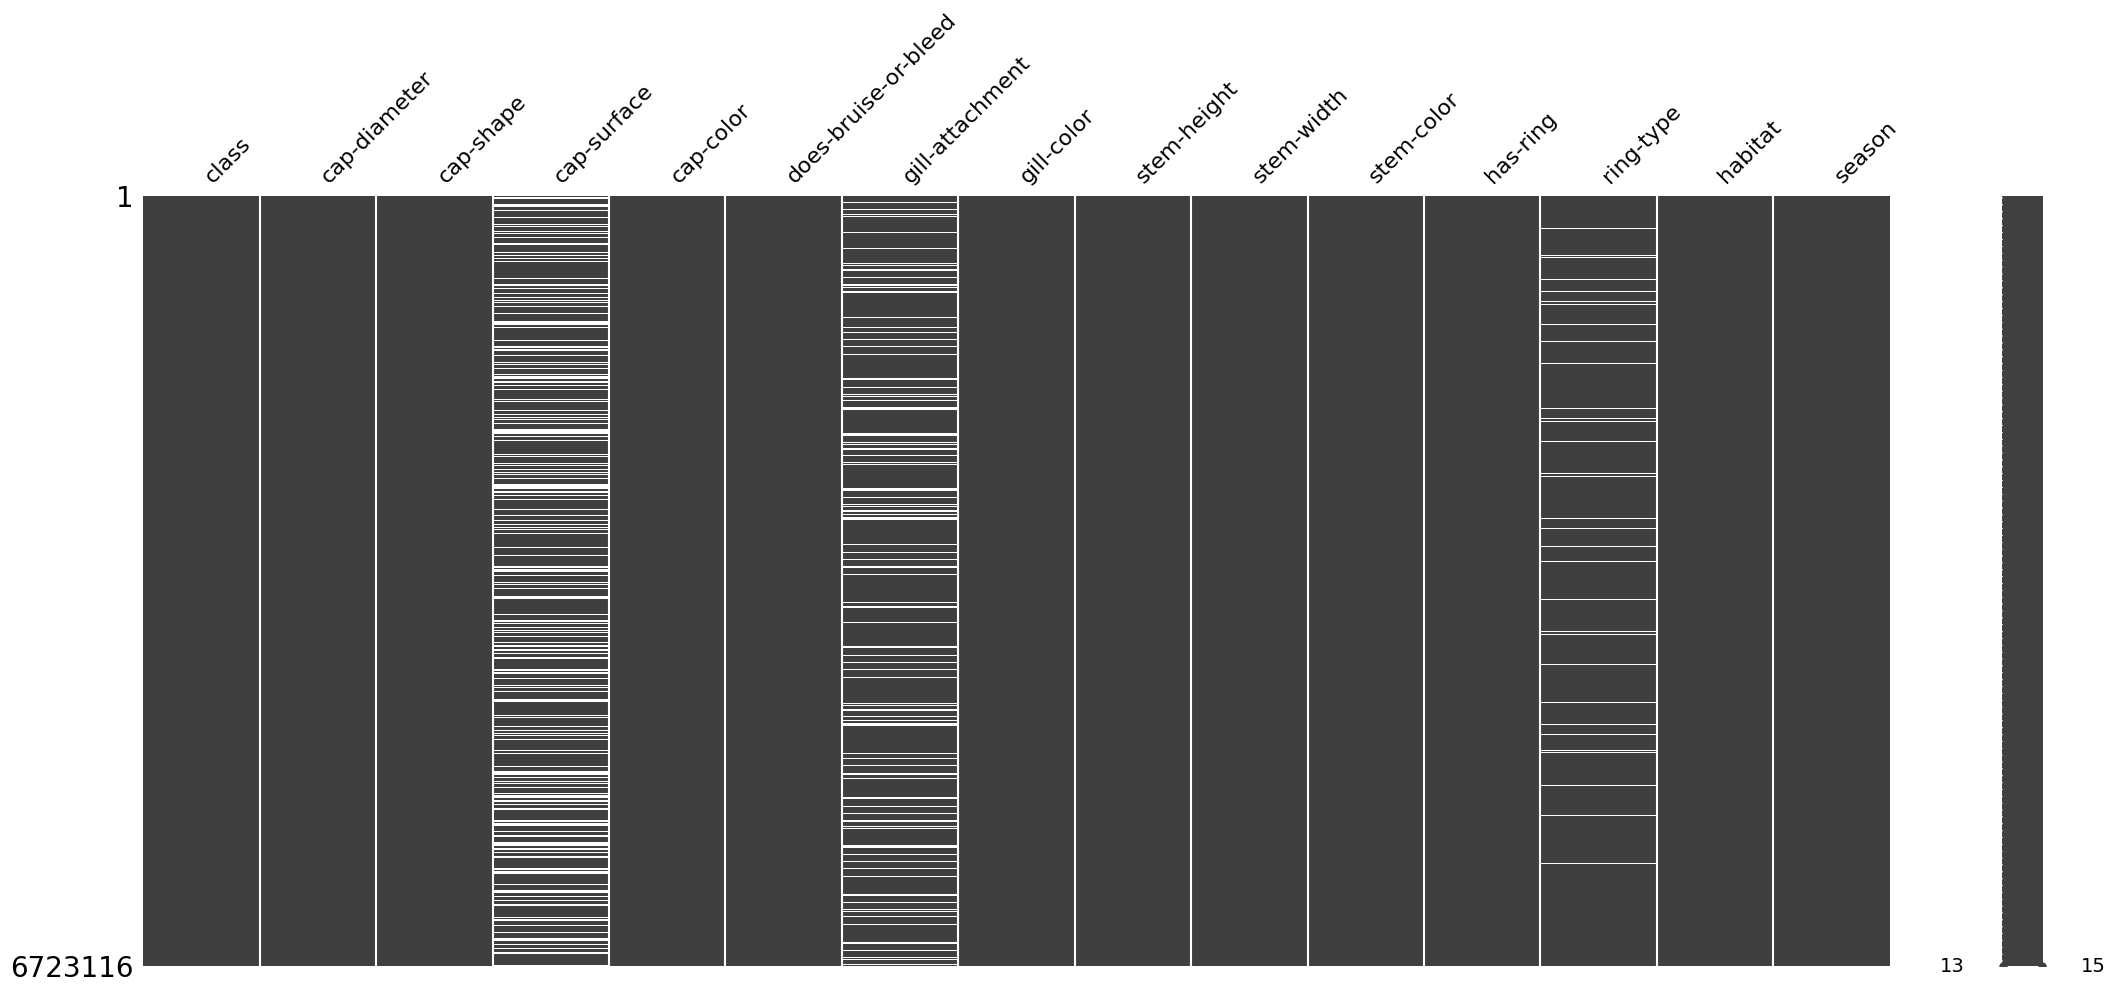

In [9]:
msn.matrix(df)

In [10]:
# แทนค่า NaN -> Mean
df.fillna(df.mean(), inplace=True)
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,17.18,4,2.0,7,0,4.0,8,18.58,18.52,8,1,4.0,8,3
1,0,15.30,3,6.0,7,0,4.0,8,16.95,17.08,8,1,4.0,8,2
2,0,14.94,4,6.0,11,0,4.0,8,16.84,16.74,8,1,6.0,8,3
3,0,13.37,4,2.0,7,0,4.0,8,18.10,17.60,8,1,4.0,8,2
4,0,17.23,3,6.0,7,0,4.0,8,17.42,16.83,8,1,6.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723111,0,1.16,4,4.0,9,0,7.0,0,2.95,5.20,9,0,0.0,8,2
6723112,0,1.34,4,4.0,9,0,7.0,0,2.94,5.94,9,0,0.0,8,2
6723113,0,1.20,4,4.0,9,0,7.0,0,3.76,4.89,9,0,0.0,8,2
6723114,0,1.32,5,4.0,9,0,7.0,0,3.12,5.30,9,0,0.0,8,3


In [11]:
# เช็ค Null
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

**** Split Data ****



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**** Random Forest ****

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training data
model_rf.fit(x_train, y_train)

# Make predictions on test data
y_pred_rf = model_rf.predict(x_test)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)

# Precision
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision (Random Forest):", precision_rf)

# Recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall (Random Forest):", recall_rf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score (Random Forest):", f1_rf)

Confusion Matrix (Random Forest):
[[735583     34]
 [    25 608982]]

Accuracy (Random Forest): 0.9999561215626078
Precision (Random Forest): 0.9999441722384962
Recall (Random Forest): 0.9999589495687242
F1 Score (Random Forest): 0.9999515608490152


**** KNN ****

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# สร้างโมเดล KNN (กำหนดค่า k = 2000 เป็นค่าเริ่มต้น เพราะข้อมูลเยอะ(6.8M))
model_knn = KNeighborsClassifier(n_neighbors=2000)

# Train the model on the training data
model_knn.fit(x_train, y_train)

# Make predictions on test data
y_pred_knn = model_knn.predict(x_test)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy (KNN):", accuracy_knn)

# Precision
precision_knn = precision_score(y_test, y_pred_knn)
print("Precision (KNN):", precision_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn)
print("Recall (KNN):", recall_knn)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score (KNN):", f1_knn)


Confusion Matrix (KNN):
[[731728   3889]
 [  2937 606070]]

Accuracy (KNN): 0.9949234879044253
Precision (KNN): 0.993624161623978
Recall (KNN): 0.9951773953337154
F1 Score (KNN): 0.9944001719490125


Save Model

In [15]:
import pickle

def save_model(model, filename="mushroom_model_RandomForest.pkl"):
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")

save_model(model_rf)

Model saved as mushroom_model_RandomForest.pkl


In [16]:
import pickle

def save_model(model, filename="mushroom_model_KNN.pkl"):
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")

save_model(model_knn)

Model saved as mushroom_model_KNN.pkl


Testing Model

In [3]:
import pickle

In [7]:
def load_model(filename="mushroom_model_KNN.pkl"):
    with open(filename, "rb") as file:
        model = pickle.load(file)
    return model

loaded_model = load_model()

In [8]:
import numpy as np

def predict(model, input_data):
    input_data = np.array(input_data).reshape(1, -1)  # แปลงเป็นรูปแบบที่โมเดลรับได้
    prediction = model.predict(input_data)
    return prediction[0]

sample = [8.07, 3, 5.641247, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

prediction_1 = predict(loaded_model, sample)

if(prediction_1 == 1):
    print("Edible")
else:
    print("poisonous")


poisonous


C:\Users\mostm\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
